In [1]:
# Data Handling & Cleaning
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model Building & Training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Saving the Model
import joblib
import pickle

# Deployment
from flask import Flask, request, jsonify  # or use FastAPI
import os
import json


In [2]:
data = pd.read_csv("cities_magicbricks_rental_prices.csv")

In [3]:
data.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0


In [4]:
data.isna().sum()

house_type    0
locality      0
city          0
area          0
beds          0
bathrooms     0
balconies     0
furnishing    0
area_rate     0
rent          0
dtype: int64

In [5]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   house_type  7691 non-null   object 
 1   locality    7691 non-null   object 
 2   city        7691 non-null   object 
 3   area        7691 non-null   float64
 4   beds        7691 non-null   int64  
 5   bathrooms   7691 non-null   int64  
 6   balconies   7691 non-null   int64  
 7   furnishing  7691 non-null   object 
 8   area_rate   7691 non-null   float64
 9   rent        7691 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 601.0+ KB
None


In [6]:
df =data.copy()

In [7]:
df.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0


In [8]:
df[['bhk', 'property_type']] = df['house_type'].str.extract(r'(\d+ BHK) (Flat|House)')

In [9]:
df['area_rate'] = pd.to_numeric(df['area_rate'], errors='coerce')
df['rent'] = pd.to_numeric(df['rent'], errors='coerce')

In [10]:
df.shape

(7691, 12)

In [11]:
df = df.drop_duplicates()


In [12]:
df.shape

(7691, 12)

In [13]:
df = df[(df['rent'] > 5000) & (df['rent'] < 500000)]


In [14]:
df.shape

(7465, 12)

In [15]:
df.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent,bhk,property_type
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0,2 BHK,Flat
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0,1 BHK,Flat
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0,1 BHK,House
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0,2 BHK,Flat
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0,1 BHK,Flat


In [16]:
df[['bhk', 'location_city']] = df['house_type'].str.extract(
    r'(\d+ BHK).*?,\s+(.+)', expand=True
)


In [17]:
df.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent,bhk,property_type,location_city
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0,2 BHK,Flat,"Goregaon East, Mumbai"
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0,1 BHK,Flat,"Powai, Mumbai"
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0,NaN,House,NaN
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0,2 BHK,Flat,Nagpur
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0,1 BHK,Flat,"Mira Road Area, Mumbai"


In [18]:
# Replace NaN with '0 BHK' (or another appropriate default value)
df['bhk'] = df['bhk'].fillna('0 BHK')

# Ensure all values in 'bhk' are strings before applying .str.replace
df['bhk'] = df['bhk'].astype(str)

# Remove ' BHK' and convert to integer
df['bhk'] = df['bhk'].str.replace(' BHK', '').astype(int)

# Clean other columns
df['location_city'] = df['location_city'].fillna('').str.strip()  # Replace NaN with empty string and strip


In [19]:
df = df.drop(columns=['house_type'])

In [20]:
df.head()

,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent,bhk,property_type,location_city
0,Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0,2,Flat,"Goregaon East, Mumbai"
1,Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0,1,Flat,"Powai, Mumbai"
2,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0,0,House,
3,Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0,2,Flat,Nagpur
4,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0,1,Flat,"Mira Road Area, Mumbai"


In [21]:

# Fix 'bhk' column values where they are 0
df['bhk'] = df['bhk'].where(df['bhk'] != 0, df['beds'])


# Clean string columns
for col in ['locality', 'city']:
    df[col] = df[col].str.strip()



In [22]:
df.head()

,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent,bhk,property_type,location_city
0,Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0,2,Flat,"Goregaon East, Mumbai"
1,Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0,1,Flat,"Powai, Mumbai"
2,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0,1,House,
3,Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0,2,Flat,Nagpur
4,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0,1,Flat,"Mira Road Area, Mumbai"


In [23]:
df['area_rate'] = df['area_rate'].fillna(df['area_rate'].median())
df['rent'] = df['rent'].fillna(df['rent'].median())
df['bhk'] = df['bhk'].fillna(df['bhk'].mode()[0])


# Data Type Conversion
df['area_rate'] = pd.to_numeric(df['area_rate'])
df['rent'] = pd.to_numeric(df['rent'])

# Converting to Categorical
df['locality'] = df['locality'].astype('category')
df['city'] = df['city'].astype('category')
df['area'] = df['area'].astype('category')
df['furnishing'] = df['furnishing'].astype('category')

df

,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent,bhk,property_type,location_city
0,Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0,2,Flat,"Goregaon East, Mumbai"
1,Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0,1,Flat,"Powai, Mumbai"
2,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0,1,House,
3,Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0,2,Flat,Nagpur
4,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0,1,Flat,"Mira Road Area, Mumbai"
...,...,...,...,...,...,...,...,...,...,...,...,...
7686,Saket,New Delhi,1750.0,3,3,0,Furnished,27.0,47000.0,3,Flat,New Delhi
7687,Phase 7 JP Nagar,Bangalore,1050.0,2,2,2,Semi-Furnished,27.0,28000.0,2,Flat,Bangalore
7688,Balewadi,Pune,734.0,2,2,2,Unfurnished,48.0,35000.0,2,Flat,"Balewadi, Pune"
7689,Shalimar bagh,New Delhi,400.0,1,1,0,Semi-Furnished,38.0,15000.0,1,Flat,New Delhi


In [24]:

# Converting Data Types
df['area_rate'] = pd.to_numeric(df['area_rate'])
df['rent'] = pd.to_numeric(df['rent'])

# Dropping Unnecessary Columns
df.drop(columns=['balconies'], inplace=True)

# Converting to Categorical where needed
df['locality'] = df['locality'].astype('category')
df['city'] = df['city'].astype('category')
df['area'] = df['area'].astype('category')
df['furnishing'] = df['furnishing'].astype('category')

df

,locality,city,area,beds,bathrooms,furnishing,area_rate,rent,bhk,property_type,location_city
0,Goregaon East,Mumbai,897.0,2,2,Semi-Furnished,134.0,120000.0,2,Flat,"Goregaon East, Mumbai"
1,Powai,Mumbai,490.0,1,1,Semi-Furnished,82.0,40000.0,1,Flat,"Powai, Mumbai"
2,Mundhwa,Pune,550.0,1,1,Unfurnished,22.0,12000.0,1,House,
3,Hingna,Nagpur,1000.0,2,2,Unfurnished,8.0,8000.0,2,Flat,Nagpur
4,Mira Road,Mumbai,595.0,1,1,Unfurnished,25.0,15000.0,1,Flat,"Mira Road Area, Mumbai"
...,...,...,...,...,...,...,...,...,...,...,...
7686,Saket,New Delhi,1750.0,3,3,Furnished,27.0,47000.0,3,Flat,New Delhi
7687,Phase 7 JP Nagar,Bangalore,1050.0,2,2,Semi-Furnished,27.0,28000.0,2,Flat,Bangalore
7688,Balewadi,Pune,734.0,2,2,Unfurnished,48.0,35000.0,2,Flat,"Balewadi, Pune"
7689,Shalimar bagh,New Delhi,400.0,1,1,Semi-Furnished,38.0,15000.0,1,Flat,New Delhi


In [25]:
df['city'].unique()

['Mumbai', 'Pune', 'Nagpur', 'Bangalore', 'New Delhi']
Categories (5, object): ['Bangalore', 'Mumbai', 'Nagpur', 'New Delhi', 'Pune']

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Feature Encoding
label_encoder = LabelEncoder()
df['furnishing'] = label_encoder.fit_transform(df['furnishing'])
df['city'] = label_encoder.fit_transform(df['city'])
df['locality'] = label_encoder.fit_transform(df['locality'])



In [27]:
df['city'].unique()

array([1, 4, 2, 0, 3])

In [28]:
df.head()

,locality,city,area,beds,bathrooms,furnishing,area_rate,rent,bhk,property_type,location_city
0,572,1,897.0,2,2,1,134.0,120000.0,2,Flat,"Goregaon East, Mumbai"
1,1360,1,490.0,1,1,1,82.0,40000.0,1,Flat,"Powai, Mumbai"
2,1155,4,550.0,1,1,2,22.0,12000.0,1,House,
3,657,2,1000.0,2,2,2,8.0,8000.0,2,Flat,Nagpur
4,1124,1,595.0,1,1,2,25.0,15000.0,1,Flat,"Mira Road Area, Mumbai"


In [29]:
df.columns

Index(['locality', 'city', 'area', 'beds', 'bathrooms', 'furnishing',
       'area_rate', 'rent', 'bhk', 'property_type', 'location_city'],
      dtype='object')

In [30]:
drop_col = ['locality', 'city', 'property_type', 'location_city']
df = df.drop(columns = drop_col)

In [31]:
df.head()

,area,beds,bathrooms,furnishing,area_rate,rent,bhk
0,897.0,2,2,1,134.0,120000.0,2
1,490.0,1,1,1,82.0,40000.0,1
2,550.0,1,1,2,22.0,12000.0,1
3,1000.0,2,2,2,8.0,8000.0,2
4,595.0,1,1,2,25.0,15000.0,1


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming df is your cleaned DataFrame
X = df.drop('rent', axis=1)  # Features
y = df['rent']  # Target

# Encoding categorical data (e.g., 'furnishing' and 'city')
label_encoders = {}
for col in ['furnishing']:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Training Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, R2: {r2_rf}')


Random Forest - MSE: 106096968.43354928, R2: 0.971084555013554


In [34]:
from sklearn.tree import DecisionTreeRegressor

# Training Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation Metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree - MSE: {mse_dt}, R2: {r2_dt}')


Decision Tree - MSE: 141935686.5236846, R2: 0.9613171460421175


In [35]:
df.to_csv('cleaned_data.csv', index=False)


In [36]:
from sklearn.model_selection import cross_val_score

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_scores = cross_val_score(dt_model, X, y, cv=5, scoring='r2')

print(f'Random Forest Cross-Validation R2: {rf_scores.mean()}')
print(f'Decision Tree Cross-Validation R2: {dt_scores.mean()}')


Random Forest Cross-Validation R2: 0.9795167825875039
Decision Tree Cross-Validation R2: 0.9701941557781485


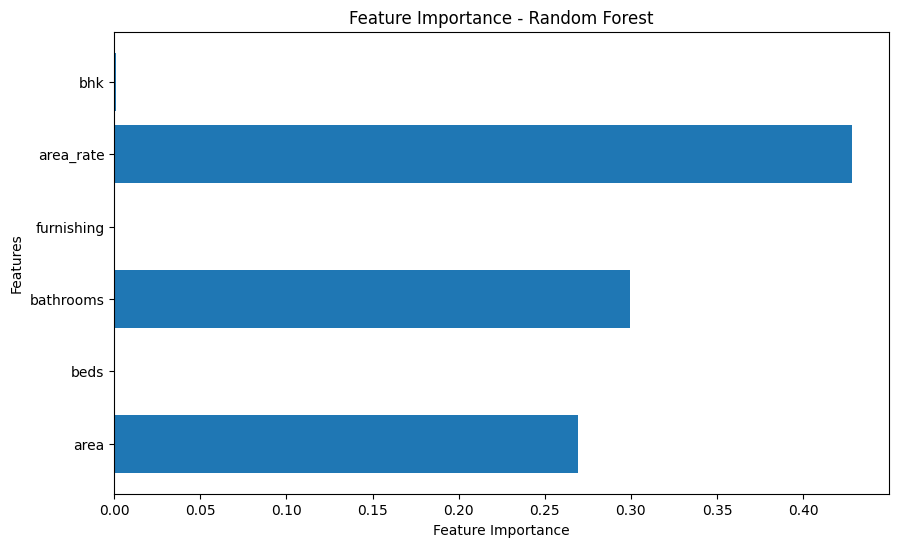

In [37]:
import matplotlib.pyplot as plt

# Fit model and plot feature importance
rf_model.fit(X, y)
feature_importance = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest')
plt.show()


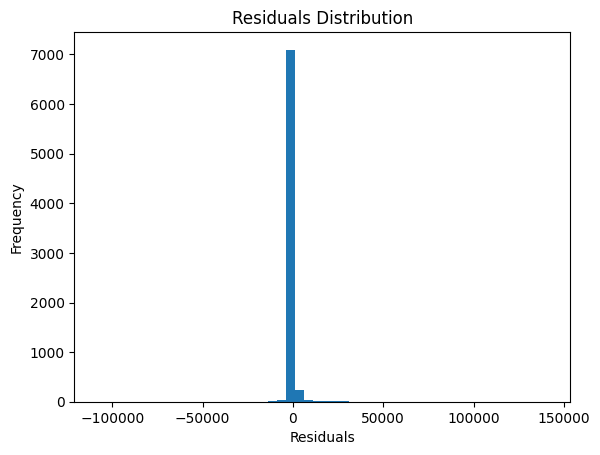

In [38]:
import numpy as np

residuals = y - rf_model.predict(X)
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()


In [39]:
from sklearn.ensemble import RandomForestRegressor
import joblib

# Assuming X_train and y_train are defined and preprocessed

# Fit Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')

print("Model saved successfully!")


Model saved successfully!


In [40]:
df.head()

,area,beds,bathrooms,furnishing,area_rate,rent,bhk
0,897.0,2,2,1,134.0,120000.0,2
1,490.0,1,1,1,82.0,40000.0,1
2,550.0,1,1,2,22.0,12000.0,1
3,1000.0,2,2,2,8.0,8000.0,2
4,595.0,1,1,2,25.0,15000.0,1


In [41]:
df.columns

Index(['area', 'beds', 'bathrooms', 'furnishing', 'area_rate', 'rent', 'bhk'], dtype='object')

In [47]:
import joblib

# Load the model
rf_model = joblib.load('random_forest_model.pkl')

# New data sample
X_new = [600, 2, 1, 0, 109, 1]

# Reshape X_new to 2D array
X_new = np.array(X_new).reshape(1, -1)

# Make predictions
predictions = rf_model.predict(X_new)

print(predictions)


[66140.]


C:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [43]:
import joblib

# Load the model
rf_model = joblib.load('random_forest_model.pkl')

# New data sample
X_new = [897, 2, 2, 1, 137, 2]

# Reshape X_new to 2D array
X_new = np.array(X_new).reshape(1, -1)

# Make predictions
predictions = rf_model.predict(X_new)

print(predictions)

[127000.]


C:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [44]:
import pandas as pd
import json

# Load your data
cities_data = pd.read_csv("cities_magicbricks_rental_prices.csv")

# Generate a mapping of areas to unique numbers
area_number_mapping = {area: idx for idx, area in enumerate(cities_data['locality'].unique())}

# Extract area rates
area_rate_mapping = cities_data[['locality', 'area_rate']].drop_duplicates().set_index('locality').to_dict()['area_rate']

# Combine area rates and numbers into a single mapping
enhanced_area_mapping = {
    area: {"rate": area_rate_mapping[area], "number": area_number_mapping[area]}
    for area in area_rate_mapping.keys()
}

# Create the final dictionary with city mapping and enhanced area mapping
api_mappings = {
    "city_mapping": {
        "Mumbai": 1,
        "Pune": 4,
        "Nagpur": 2,
        "Bangalore": 0,
        "New Delhi": 3
    },
    "enhanced_area_mapping": enhanced_area_mapping
}

# Save to a JSON file
output_file_path = "enhanced_api_mappings.json"
with open(output_file_path, "w") as json_file:
    json.dump(api_mappings, json_file, indent=4)

print(f"Enhanced mappings saved to {output_file_path}")


Enhanced mappings saved to enhanced_api_mappings.json
